In [41]:
from gnewsclient import gnewsclient
from newspaper import Article
import re
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import OrderedDict
import matplotlib.pyplot as plt

In [42]:
topics = ['Health', 'Entertainment', 'Science', 'Sports', 'Nation']
news = []
articles_per_topic = 50
client = gnewsclient.NewsClient(language='English', location='india', topic=topics[0], max_results=articles_per_topic)

for topic in topics:
    client.topic = topic
    news.append(client.get_news())

In [43]:
documents = []
total_categories = len(news)

for i in range(total_categories):
    for j in range(len(news[i])):
        url = news[i][j]['link']
        try:
            article = Article(url)
            article.download()
            article.parse()
        except:
            continue
        documents.append(article.text)

C:\Users\akshi\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname IST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [44]:
len(documents)

247

# **Apply Preprocessing**
## **1. Remove Punctuation**<br>
## **2. Case Folding**

In [45]:
for i in range(len(documents)):
    documents[i] = re.sub(r'[^\w\s]', '', documents[i])
    documents[i] = documents[i].lower()

In [46]:
tokens = []
tokens_ns_s = []
tokens_ns_ns = []
tokens_s_ns = []
stopwrds = stopwords.words()


## **3. Remove Stopwords**<br>
## **4. Perform Stemming**
## **5. Remove other language words if its there**

In [47]:
ps = PorterStemmer()
words = nltk.corpus.words.words()

for i in range(len(documents)):
    text_tokens = word_tokenize(documents[i])
    tokens_per_doc = []
    tokens_s_ns_per_doc = []
    tokens_ns_ns_per_doc = []
    tokens_ns_s_per_doc = []
    for word in text_tokens:
        if word in words:
            tokens_ns_s_per_doc.append(ps.stem(word))
            tokens_ns_ns_per_doc.append(word)
            if word not in stopwrds:
                tokens_per_doc.append(ps.stem(word))
                tokens_s_ns_per_doc.append(word)
    tokens.append(tokens_per_doc)
    tokens_s_ns.append(tokens_s_ns_per_doc)
    tokens_ns_s.append(tokens_ns_s_per_doc)
    tokens_ns_ns.append(tokens_ns_ns_per_doc)

print(len(tokens))
print(len(documents))

247
247


## **5. a)Creation of the Inverted Index (After stopword removal, stemming)**

In [48]:
dict = {}
for i in range(len(documents)):
    for word in tokens[i]:
        if word not in dict:
            dict[word] = [i]
        if word in dict:
            if(i not in dict[word]):
                dict[word].append(i)
S_S = len(dict)
print("Vocabular size with stopward removal with stemming --> ",len(dict))

Vocabular size with stopward removal with stemming -->  5014



## **5. b)Creation of the Inverted Index (After stopword removal without stemming)**

In [49]:
dict_s_ns = {}
for i in range(len(documents)):
    for word in tokens_s_ns[i]:
        if word not in dict_s_ns:
            dict_s_ns[word] = [i]
        if word in dict_s_ns:
            if(i not in dict_s_ns[word]):
                dict_s_ns[word].append(i)

S_NS = len(dict_s_ns)
print("Vocabular size with stopward removal without stemming --> ", len(dict_s_ns))

Vocabular size with stopward removal without stemming -->  6276


## **5. c)Creation of the Inverted Index (Without stopword removal but with stemming)**

In [50]:

dict_ns_s = {}
for i in range(len(documents)):
    for word in tokens_ns_s[i]:
        if word not in dict_ns_s:
            dict_ns_s[word] = [i]
        if word in dict_ns_s:
            if(i not in dict_ns_s[word]):
                dict_ns_s[word].append(i)

NS_S = len(dict_ns_s)
print("Vocabular size without stopward removal with stemming --> ",len(dict_ns_s))

Vocabular size without stopward removal with stemming -->  5216



## **5. d)Creation of the Inverted Index (Without stopword removal and Without stemming)**

In [51]:
dict_ns_ns = {}
for i in range(len(documents)):
    for word in tokens_ns_ns[i]:
        if word not in dict_ns_ns:
            dict_ns_ns[word] = [i]
        if word in dict_ns_ns:
            if(i not in dict_ns_ns[word]):
                dict_ns_ns[word].append(i)

NS_NS = len(dict_ns_ns)
print("Vocabular size without stopward removal without stemming --> ",len(dict_ns_ns))

Vocabular size without stopward removal without stemming -->  6502


## **6. Sorting the Index terms**

In [52]:
dict = OrderedDict(sorted(dict.items()))

In [53]:
for word in dict:
    print(word, "-->", dict[word], end="\n")

aam --> [212]
aback --> [71]
abandon --> [119, 178]
abey --> [228]
abil --> [2, 15, 18, 19, 42, 108, 147, 158, 160, 170, 210]
abl --> [15, 24, 26, 39, 41, 72, 75, 79, 105, 108, 109, 114, 124, 128, 136, 139, 143, 145, 150, 162, 170, 175, 178, 184, 190, 218]
abli --> [91]
abnorm --> [7, 17, 34, 45]
aboard --> [113]
abound --> [26]
abras --> [107, 135]
abroad --> [85, 168]
absenc --> [163, 182]
absent --> [166]
absolut --> [15, 46, 48, 176, 177, 192]
absorb --> [6, 115, 142]
absorpt --> [0, 47, 141]
abstract --> [201]
absurd --> [126]
abu --> [114]
abund --> [61, 114]
abus --> [45, 156, 174, 183, 188]
academ --> [221]
academi --> [25, 111, 130, 137, 156, 191]
acceler --> [24, 105, 111, 118, 131, 197]
accent --> [80, 91]
accept --> [15, 177, 186, 215, 229]
access --> [0, 2, 18, 26, 42, 53, 106, 107, 108, 184, 220, 221]
accid --> [132, 133, 227]
acclaim --> [81]
accolad --> [190]
accommod --> [211, 231]
accomplish --> [99, 194]
accord --> [2, 3, 4, 6, 7, 8, 9, 10, 14, 15, 17, 18, 19, 20, 24

In [54]:
def boolean_check(term1="", term2="", term3="", operators = [1,1,1]):
    term1 = normalizeTerm(term1);
    term2 = normalizeTerm(term2);
    term3 = normalizeTerm(term3);
    if term1 in dict and term2 in dict and term3 in dict:
        doc_ids = set(range(len(documents)))
        if(operators[0] == 1):
            docs_term1 = set(dict[term1])
        else:
            docs_term1 = doc_ids.difference(set(dict[term1]))

        if(operators[1] == 1):
            docs_term2 = set(dict[term2])
        else:
            docs_term2 = doc_ids.difference(set(dict[term2]))

        if(operators[2] == 1):
            docs_term3 = set(dict[term3])
        else:
            docs_term3 = doc_ids.difference(set(dict[term3]))

        set1 = docs_term1.intersection(docs_term2)
        set2 = set1.intersection(docs_term3)

        if(len(set2) > 0):
            return set2
        else:
            return ()
    return ()


# **Normalize the terms of the query**

In [55]:
def normalizeTerm(term):
    term = re.sub(r'[^\w\s]', '', term)
    term = term.lower()
    term = ps.stem(term)
    return term

In [56]:
boolean_check("abl", "accord", "area", [1,1,0])

{15, 24, 105, 114, 124, 128, 170, 184, 218}

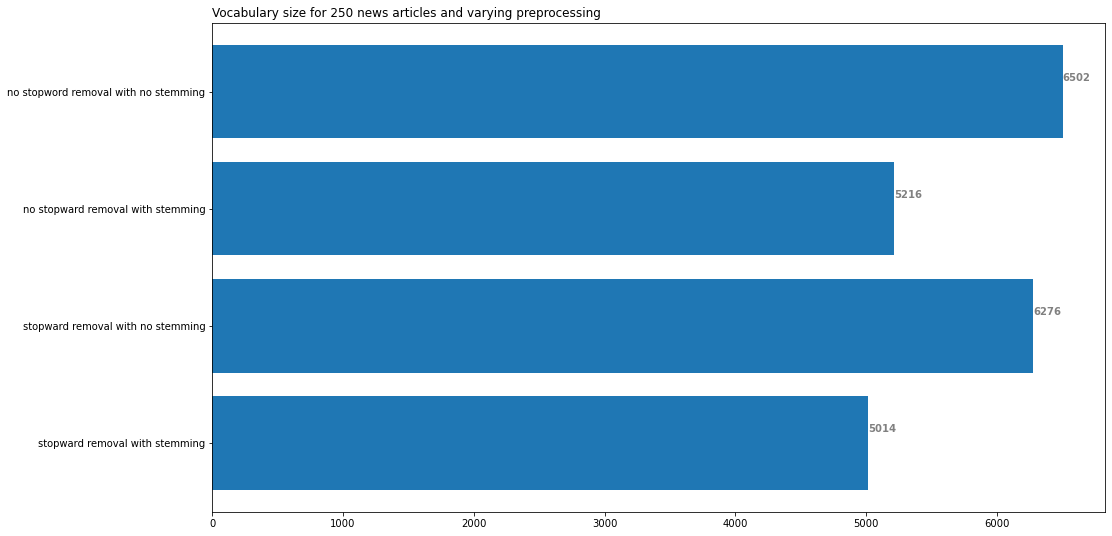

In [58]:
preprocess = ["stopward removal with stemming", "stopward removal with no stemming", "no stopward removal with stemming", "no stopword removal with no stemming"]
values = [S_S, S_NS, NS_S, NS_NS]

fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(preprocess, values)
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
ax.set_title('Vocabulary size for 250 news articles and varying preprocessing', loc='left')
plt.show()